In [1]:
import pandas as pd
import numpy as np
import skbio
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import researchpy as rp
from matplotlib import rcParams
from scipy import stats
rcParams.update({'figure.autolayout': True})


In [2]:
date = '31.10.19'

In [3]:
luminescence_means = f'../../../../data/luminescence/to_be_sorted/{date}/output_means.csv'
luminescence_raw = f'../../../../data/luminescence/to_be_sorted/{date}/output_raw.csv'

In [4]:
luminescence_means_df = pd.read_csv(luminescence_means, header=0)
luminescence_raw_df = pd.read_csv(luminescence_raw, header=0)

In [5]:
luminescence_means_df

,name,condition,mean_luminescence,standard_error,date
0,25 + 34,K3G1,0.926288,0.816923,31.10.19
1,25 + 34,W5,0.250939,NaN,31.10.19
2,35 + 34,K3G1,42.254006,14.446092,31.10.19
3,35 + 34,W5,11.799205,NaN,31.10.19
4,36 + 34,K3G1,1.299861,0.133043,31.10.19
5,36 + 34,W5,14.537415,NaN,31.10.19
6,70 + 34,K3G1,790.613463,155.204585,31.10.19
7,70 + 34,W5,337.425769,NaN,31.10.19
8,71 + 34,K3G1,622.242963,407.815826,31.10.19
9,71 + 34,W5,94.669039,NaN,31.10.19


In [6]:
luminescence_raw_df

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date
0,A,1,Sample X1,118850.0,12998.0,25 + 34,K3G1,0.109365,31.10.19
1,A,2,Sample X2,1694.0,2953.0,25 + 34,K3G1,1.743211,31.10.19
2,A,3,Sample X3,1331.0,334.0,25 + 34,W5,0.250939,31.10.19
3,B,1,Sample X4,14051.0,390729.0,35 + 34,K3G1,27.807914,31.10.19
4,B,2,Sample X5,8086.0,458477.0,35 + 34,K3G1,56.700099,31.10.19
5,B,3,Sample X6,503.0,5935.0,35 + 34,W5,11.799205,31.10.19
6,C,1,Sample X7,16599.0,19368.0,36 + 34,K3G1,1.166817,31.10.19
7,C,2,Sample X8,19092.0,27357.0,36 + 34,K3G1,1.432904,31.10.19
8,C,3,Sample X9,441.0,6411.0,36 + 34,W5,14.537415,31.10.19
9,D,1,Sample X10,19847.0,12610960.0,70 + 34,K3G1,635.408878,31.10.19


In [7]:
#remove column 12

In [8]:
#add promoter names column
luminescence_raw_df['Promoter'] = luminescence_raw_df.name 

In [9]:
# luminescence_raw_df.loc[luminescence_raw_df.name == '71 + 72', 'Promoter'] = 'UBQ10'
# luminescence_raw_df.loc[luminescence_raw_df.name == '71+72', 'Promoter'] = 'UBQ10'
# luminescence_raw_df.loc[luminescence_raw_df.name == '25+72', 'Promoter'] = 'NIR1'
# luminescence_raw_df.loc[luminescence_raw_df.name == '35+72', 'Promoter'] = 'NOS'
# luminescence_raw_df.loc[luminescence_raw_df.name == '36+72', 'Promoter'] = 'STAP4'
# luminescence_raw_df.loc[luminescence_raw_df.name == '92+72', 'Promoter'] = 'NRP'
# luminescence_raw_df.loc[luminescence_raw_df.name == '92+29+72', 'Promoter'] = 'NRP+NLP7_TF'
luminescence_raw_df.loc[luminescence_raw_df.name == '25 + 34', 'Promoter'] = 'NIR1:LucN/35S:LucF'
luminescence_raw_df.loc[luminescence_raw_df.name == '35 + 34', 'Promoter'] = 'NOS:LucN/35S:LucF'
luminescence_raw_df.loc[luminescence_raw_df.name == '36 + 34', 'Promoter'] = 'STAP4:LucN/35S:LucF'
luminescence_raw_df.loc[luminescence_raw_df.name == '70 + 34', 'Promoter'] = '35S:LucN/35S:LucF'
luminescence_raw_df.loc[luminescence_raw_df.name == '70 + 34', 'Promoter'] = '35S:LucN/35S:LucF'
luminescence_raw_df.loc[luminescence_raw_df.name == '71 + 34', 'Promoter'] = 'UBQ10:LucN/35S:LucF'
luminescence_raw_df.loc[luminescence_raw_df.name == '71 + 72', 'Promoter'] = 'UBQ10:LucN/UBQ10:LucF'

In [10]:
#select UBQ10/35S delivery calibrator promoter means
#UBQ10_means_old = luminescence_means_df[(luminescence_means_df.name == '71 + 72') | (luminescence_means_df.name == '71+72')].copy()
#UBQ10_means_old

In [11]:
#Create correction factor of 179.03/meanluminescence of differing condition for each condition
#UBQ10_means_old['correction_factor'] = UBQ10_means_old.iloc[1][2] / UBQ10_means_old['mean_luminescence']

In [12]:
#UBQ10_means_old.iloc[1][2]

In [13]:
#UBQ10_means_old

In [14]:
#select UBQ10:fluc condition means
luminescence_raw_df_means = luminescence_raw_df[['condition', 'fluc_luminescence']].groupby('condition').mean().reset_index()
luminescence_raw_df_means

,condition,fluc_luminescence
0,K3G1,20323.416667
1,W5,1209.333333


In [15]:
#Create correction factor of K3G1/fluc_luminescence for each condition
#luminescence_raw_df_means['correction_factor'] = luminescence_raw_df_means.iloc[0][1] / luminescence_raw_df_means['fluc_luminescence']

In [16]:
#luminescence_raw_df_means.iloc[0][1]

In [17]:
#luminescence_raw_df_means

In [18]:
#create new corrected UBQ10:fluc column
#first merge dfs, only adding the correction factor column
luminescence_raw = pd.merge(luminescence_raw_df, luminescence_raw_df_means[['condition']], on='condition')
#then create corrected_fluc column, fluc multiplied by correction factor
#luminescence_raw_corrected_fluc['corrected_fluc'] = luminescence_raw_corrected_fluc['fluc_luminescence'] * luminescence_raw_corrected_fluc['correction_factor']
#correct nluc/fluc:
luminescence_raw['nluc/fluc'] = luminescence_raw['nluc_luminescence']/luminescence_raw['fluc_luminescence']

In [19]:
luminescence_raw_df

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date,Promoter
0,A,1,Sample X1,118850.0,12998.0,25 + 34,K3G1,0.109365,31.10.19,NIR1:LucN/35S:LucF
1,A,2,Sample X2,1694.0,2953.0,25 + 34,K3G1,1.743211,31.10.19,NIR1:LucN/35S:LucF
2,A,3,Sample X3,1331.0,334.0,25 + 34,W5,0.250939,31.10.19,NIR1:LucN/35S:LucF
3,B,1,Sample X4,14051.0,390729.0,35 + 34,K3G1,27.807914,31.10.19,NOS:LucN/35S:LucF
4,B,2,Sample X5,8086.0,458477.0,35 + 34,K3G1,56.700099,31.10.19,NOS:LucN/35S:LucF
5,B,3,Sample X6,503.0,5935.0,35 + 34,W5,11.799205,31.10.19,NOS:LucN/35S:LucF
6,C,1,Sample X7,16599.0,19368.0,36 + 34,K3G1,1.166817,31.10.19,STAP4:LucN/35S:LucF
7,C,2,Sample X8,19092.0,27357.0,36 + 34,K3G1,1.432904,31.10.19,STAP4:LucN/35S:LucF
8,C,3,Sample X9,441.0,6411.0,36 + 34,W5,14.537415,31.10.19,STAP4:LucN/35S:LucF
9,D,1,Sample X10,19847.0,12610960.0,70 + 34,K3G1,635.408878,31.10.19,35S:LucN/35S:LucF


In [20]:
luminescence_raw_df.condition.unique()

array(['K3G1', 'W5'], dtype=object)

In [21]:
luminescence_raw_df[luminescence_raw_df.Promoter == 'NRP+NLP7_TF']

,well_row,well_col,content,fluc_luminescence,nluc_luminescence,name,condition,nluc/fluc,date,Promoter


In [22]:
#set style to ticks
sns.set(style="ticks", color_codes=True)

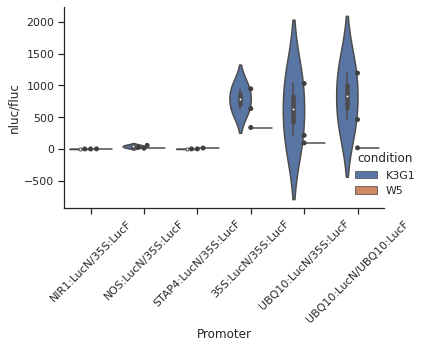

In [23]:
plot = sns.catplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, hue='condition', kind='violin')
plt.xticks(rotation=45)
#plot points
ax = sns.swarmplot(x="Promoter", y="nluc/fluc", data=luminescence_raw_df, color=".25").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/luminescence_violin.pdf', format='pdf')

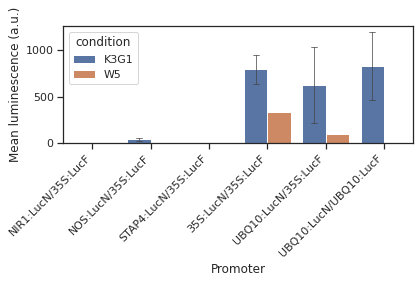

In [26]:

#bar chart, 68% confidence intervals (1 Standard error)
plot = sns.barplot(x="Promoter", y="nluc/fluc", hue="condition", data=luminescence_raw_df, ci=68, capsize=0.1,errwidth=0.7,n_boot=10000)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')
plt.ylabel("Mean luminescence (a.u.)").get_figure().savefig(f'../../../../data/plots/luminescence/{date}/promoter_luminescence.pdf', format='pdf')

### get names of each condition for later

In [25]:
pd.Categorical(luminescence_raw_df.condition)
names = luminescence_raw_df.condition.unique()
for name in names:
    print(name)

K3G1
W5


In [91]:
#get list of promoters
pd.Categorical(luminescence_raw_df.Promoter)
prom_names = luminescence_raw_df.Promoter.unique()
for name in prom_names:
    print(name)

NIR1(1000bp):LucN/35S:LucF
NOS:LucN/35S:LucF
STAP4:LucN/35S:LucF
35S:LucN/35S:LucF
UBQ10:LucN/35S:LucF
UBQ10:LucN/UBQ10:LucF


### test normality

In [92]:
#returns test statistic, p-value
for name1 in prom_names:
    for name in names:
        print('{}: {}'.format(name, stats.shapiro(luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == name])))


K3G1: (0.8049345016479492, 0.010666717775166035)
W5: (0.6742411851882935, 0.003271136898547411)
K3G1: (0.8049345016479492, 0.010666717775166035)
W5: (0.6742411851882935, 0.003271136898547411)
K3G1: (0.8049345016479492, 0.010666717775166035)
W5: (0.6742411851882935, 0.003271136898547411)
K3G1: (0.8049345016479492, 0.010666717775166035)
W5: (0.6742411851882935, 0.003271136898547411)
K3G1: (0.8049345016479492, 0.010666717775166035)
W5: (0.6742411851882935, 0.003271136898547411)
K3G1: (0.8049345016479492, 0.010666717775166035)
W5: (0.6742411851882935, 0.003271136898547411)


#### not normal

In [98]:
#test variance
stats.levene(luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == names[0]], 
               luminescence_raw_df['nluc/fluc'][luminescence_raw_df.condition == names[1]], 
              )

LeveneResult(statistic=3.72498792680374, pvalue=0.07152744064742468)

In [118]:
test = luminescence_raw_df.groupby('Promoter')

In [119]:
test

In [127]:
stats.mannwhitneyu(value['nluc/fluc'][value.condition == names[0]], 
               value['nluc/fluc'][value.condition == names[1]])

MannwhitneyuResult(statistic=0.0, pvalue=0.27014568730370997)

In [123]:
for promoter, value in test:
    print(stats.mannwhitneyu(value['nluc/fluc'][value.condition == names[0]], 
               value['nluc/fluc'][value.condition == names[1]]))

MannwhitneyuResult(statistic=0.0, pvalue=0.27014568730370997)
MannwhitneyuResult(statistic=1.0, pvalue=0.27014568730370997)
MannwhitneyuResult(statistic=0.0, pvalue=0.27014568730370997)
MannwhitneyuResult(statistic=0.0, pvalue=0.27014568730370997)
MannwhitneyuResult(statistic=0.0, pvalue=0.27014568730370997)
MannwhitneyuResult(statistic=0.0, pvalue=0.27014568730370997)


In [128]:

for promoter, value in test:
    print(value)

   well_row  well_col     content  fluc_luminescence  nluc_luminescence  \
9         D         1  Sample X10            19847.0         12610960.0   
10        D         2  Sample X11            22995.0         21749086.0   
11        D         3  Sample X12             2243.0           756846.0   

       name condition   nluc/fluc      date           Promoter  
9   70 + 34      K3G1  635.408878  31.10.19  35S:LucN/35S:LucF  
10  70 + 34      K3G1  945.818047  31.10.19  35S:LucN/35S:LucF  
11  70 + 34        W5  337.425769  31.10.19  35S:LucN/35S:LucF  
  well_row  well_col    content  fluc_luminescence  nluc_luminescence  \
0        A         1  Sample X1           118850.0            12998.0   
1        A         2  Sample X2             1694.0             2953.0   
2        A         3  Sample X3             1331.0              334.0   

      name condition  nluc/fluc      date                    Promoter  
0  25 + 34      K3G1   0.109365  31.10.19  NIR1(1000bp):LucN/35S:LucF  
1 